<a href="https://colab.research.google.com/github/aknsntn/math_ml/blob/main/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%B0%D1%86%D0%B8%D0%B8%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –ù–µ–π—Ä–æ–Ω —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ —Ñ—É–Ω–∫—Ü–∏—è–º–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏

–í —ç—Ç–æ–º –∑–∞–¥–∞–Ω–∏–∏ –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç: 
- —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –∫–ª–∞—Å—Å **`Neuron()`** —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ —Ñ—É–Ω–∫—Ü–∏—è–º–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ (ReLU, LeakyReLU –∏ ELU)

- –æ–±—É—á–∏—Ç—å –∏ –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å —ç—Ç–æ—Ç –∫–ª–∞—Å—Å –Ω–∞ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏ —Ä–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

**–î–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å ReLU –∏ –µ—â—ë –æ–¥–Ω—É –∏–∑ –¥–≤—É—Ö.**

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import *

import numpy as np
import pandas as pd

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

–í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º—ã —Å–Ω–æ–≤–∞ —Ä–µ—à–∞–µ–º –∑–∞–¥–∞—á—É –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ (2 –∫–ª–∞—Å—Å–∞: 1 –∏–ª–∏ 0). –ú—ã —É–∂–µ –≤—ã—è—Å–Ω–∏–ª–∏ (–≤ –Ω–æ—É—Ç–±—É–∫–µ –ø—Ä–æ `logloss`), —á—Ç–æ –ø–ª–æ—Ö–æ –±—Ä–∞—Ç—å –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å, –æ–¥–Ω–∞–∫–æ –∑–¥–µ—Å—å –¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –≤–æ–∑—å–º—ë–º –µ—ë:

$$
Loss(\hat{y}, y) = \frac{1}{n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2
$$  

–ó–¥–µ—Å—å $w \cdot X_i$ - —Å–∫–∞–ª—è—Ä–Ω–æ–µ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ, –∞ $\hat{y_i} = \sigma(w \cdot X_i) =\frac{1}{1+e^{-w \cdot X_i}} $ - —Å–∏–≥–º–æ–∏–¥–∞ ($i$ -- –Ω–æ–º–µ—Ä –æ–±—ä–µ–∫—Ç–∞ –≤ –≤—ã–±–æ—Ä–∫–µ). 

In [ ]:
def Loss(y_pred, y):
    y_pred = y_pred.reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    return 0.5 * np.mean((y_pred - y) ** 2)

–î–∞–ª–µ–µ –±—É–¥—É—Ç –ø—Ä–µ–¥–ª–æ–∂–µ–Ω—ã –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ñ—É–Ω–∫—Ü–∏–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, –∏ –í–∞–º –Ω—É–∂–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –∫–ª–∞—Å—Å `Neuron` –ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å —Ç–µ–º, –∫–∞–∫ —ç—Ç–æ –±—ã–ª–æ –Ω–∞ —Å–µ–º–∏–Ω–∞—Ä–µ. –°–∞–º –ø—Ä–∏–Ω—Ü–∏–ø —Ç–æ—Ç –∂–µ, –Ω–æ –º–µ–Ω—è—é—Ç—Å—è —Ñ–æ—Ä–º—É–ª–∞ –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≤–µ—Å–æ–≤ –∏ —Ñ–æ—Ä–º—É–ª–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.

# –ù–µ–π—Ä–æ–Ω —Å ReLU (Recitified Linear Unit)

ReLU —Å–∞–º–∞—è —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º–∞—è (–ø–æ –∫—Ä–∞–π–Ω–µ–π –º–µ—Ä–µ, –ø–∞—Ä—É –ª–µ—Ç –Ω–∞–∑–∞–¥) —Ñ—É–Ω–∫—Ü–∏—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –≤ –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç—è—Ö. –í—ã–≥–ª—è–¥–∏—Ç –æ–Ω–∞ –æ—á–µ–Ω—å –ø—Ä–æ—Å—Ç–æ:

\begin{equation*}
ReLU(x) =
 \begin{cases}
   0, &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

–ò–ª–∏ –ø–æ-–¥—Ä—É–≥–æ–º—É:

$$
ReLU(x) = \max(0, x)
$$

–í (—Å–≤–æ–±–æ–¥–Ω–æ–º) –ø–µ—Ä–µ–≤–æ–¥–µ Rectified Linear Unit = "–£—Å–µ—á—ë–Ω–Ω–∞—è –ª–∏–Ω–µ–π–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è". –°–æ–±—Å—Ç–≤–µ–Ω–Ω–æ, –º—ã –ø–æ —Å—É—Ç–∏ –ø—Ä–æ—Å—Ç–æ –Ω–µ –¥–∞—ë–º –ø—Ä–æ—Ö–æ–¥–∏—Ç—å –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–º —á–∏—Å–ª–∞–º.

–ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è –∑–¥–µ—Å—å –±–µ—Ä—ë—Ç—Å—è –∫–∞–∫ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è –æ—Ç –∫—É—Å–æ—á–Ω–æ-–∑–∞–¥–∞–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏, —Ç–æ –µ—Å—Ç—å –Ω–∞ —É—á–∞—Å—Ç–∫–∞—Ö, –≥–¥–µ —Ñ—É–Ω–∫—Ü–∏—è –≥–ª–∞–¥–∫–∞—è, –∏ –≤ –Ω—É–ª–µ –µ—ë –¥–æ–æ–ø—Ä–µ–¥–ª—è—é—Ç –Ω—É–ª—ë–º:

\begin{equation*}
ReLU'(x) = 
 \begin{cases}
   0, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

–ü–æ–¥—Å—Ç–∞–≤–∏–º ReLu –≤ Loss:

$$Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (ReLU(w \cdot X_i) - y_i)^2 = \begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n}
 \begin{cases}
    y_i^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$  

(–ø–æ–º–Ω–∏—Ç–µ, —á—Ç–æ $w \cdot X_i$ -- —ç—Ç–æ —á–∏—Å–ª–æ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ (—Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å–∫–∞–ª—è—Ä–Ω–æ–≥–æ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏—è –¥–≤—É—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤)).

–¢–æ–≥–¥–∞ —Ñ–æ—Ä–º—É–ª–∞ –¥–ª—è –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≤–µ—Å–æ–≤ –ø—Ä–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–º —Å–ø—É—Å–∫–µ –±—É–¥–µ—Ç —Ç–∞–∫–∞—è (–≤ –º–∞—Ç—Ä–∏—á–Ω–æ–º –≤–∏–¥–µ, —Ä–µ–∫–º–æ–µ–Ω–¥—É–µ–º –≤—ã–≤–µ—Å—Ç–∏ —Å–∞–º–∏–º —Ç–æ, –∫–∞–∫ —ç—Ç–æ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –∏–∑ —Ñ–æ—Ä–º—É–ª—ã –¥–ª—è –æ–¥–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞):

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\frac{1}{n}\sum_{i=1}^{n}
 \begin{cases}
   0, &{w \cdot X_i \le 0}\\
   \frac{1}{n} X_i^T (w \cdot X_i - y), &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

(–Ω–∞–ø–æ–º–∏–Ω–∞–µ–º, —á—Ç–æ –∑–¥–µ—Å—å $w \cdot X$ -- –º–∞—Ç—Ä–∏—á–Ω–æ–µ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–∞ $w$ (–≤–µ–¥—å –≤–µ–∫—Ç–æ—Ä -- —Ç–æ–∂–µ –º–∞—Ç—Ä–∏—Ü–∞, –Ω–µ —Ç–∞–∫ –ª–∏?) –∏ –º–∞—Ç—Ä–∏—Ü—ã $X$ )

–ü–æ—á–µ–º—É –≤ –ø–µ—Ä–≤–æ–º —Å–ª—É—á–∞–µ –±—É–¥–µ—Ç 0? –ü–æ—Ç–æ–º—É —á—Ç–æ –≤ —Ñ–æ—Ä–º—É–ª—É $y_i^2$ –Ω–µ –≤—Ö–æ–¥—è—Ç –≤–µ—Å–∞ , –∞ –º—ã –±–µ—Ä—ë–º –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é –∏–º–µ–Ω–Ω–æ –ø–æ –≤–µ—Å–∞–º $w$.

* –†–µ–∞–ª–∏–∑—É–π—Ç–µ ReLU –∏ –µ—ë –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é:

In [ ]:
def relu(x):
    """ReLU-—Ñ—É–Ω–∫—Ü–∏—è"""
    return (x > 0) * x

In [ ]:
def relu_derivative(x):
    """–ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è ReLU"""
    return (x > 0) * 1

–¢–µ–ø–µ—Ä—å –Ω—É–∂–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å –Ω–µ–π—Ä–æ–Ω —Å ReLU. –ó–¥–µ—Å—å –≤—Å—ë –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–µ –Ω–∞ –ø–µ—Ä—Ü–µ–ø—Ç—Ä–æ–Ω, –Ω–æ –±—É–¥—É—Ç –ø–æ-–¥—Ä—É–≥–æ–º—É –æ–±–Ω–æ–≤–ª—è—Ç—å—Å—è –≤–µ—Å–∞ –∏ –¥—Ä—É–≥–∞—è —Ñ—É–Ω–∫—Ü–∏—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏:

In [ ]:
class NeuronReLU:
    def __init__(self, w=None, b=0):
        """
        :param: w -- –≤–µ–∫—Ç–æ—Ä –≤–µ—Å–æ–≤
        :param: b -- —Å–º–µ—â–µ–Ω–∏–µ
        """
        self.w = w
        self.b = b
        
        
    def activate(self, x):
        return relu(x)
        
        
    def forward_pass(self, X):
        """
        –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç –æ—Ç–≤–µ—Ç –Ω–µ–π—Ä–æ–Ω–∞ –ø—Ä–∏ –ø—Ä–µ–¥—ä—è–≤–ª–µ–Ω–∏–∏ –Ω–∞–±–æ—Ä–∞ –æ–±—ä–µ–∫—Ç–æ–≤
        :param: X -- –º–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–º–µ—Ä–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, m), –∫–∞–∂–¥–∞—è —Å—Ç—Ä–æ–∫–∞ - –æ—Ç–¥–µ–ª—å–Ω—ã–π –æ–±—ä–µ–∫—Ç
        :return: –≤–µ–∫—Ç–æ—Ä —Ä–∞–∑–º–µ—Ä–∞ (n, 1) –∏–∑ –Ω—É–ª–µ–π –∏ –µ–¥–∏–Ω–∏—Ü —Å –æ—Ç–≤–µ—Ç–∞–º–∏ –Ω–µ–π—Ä–æ–Ω–∞ 
        """
        n = X.shape[0]
        y_pred = np.zeros((n, 1))  # y_pred == y_predicted - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã
        y_pred = self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)
        return y_pred.reshape(-1, 1)
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        """
        –û–±–Ω–æ–≤–ª—è–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –≤–µ—Å–æ–≤ –Ω–µ–π—Ä–æ–Ω–∞ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å —ç—Ç–∏–º –æ–±—ä–µ–∫—Ç–æ–º
        :param: X -- –º–∞—Ç—Ä–∏—Ü–∞ –≤—Ö–æ–¥–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, m)
                y -- –≤–µ–∫—Ç–æ—Ä –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, 1)
                learning_rate - "—Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è" (—Å–∏–º–≤–æ–ª alpha –≤ —Ñ–æ—Ä–º—É–ª–∞—Ö –≤—ã—à–µ)
        –í —ç—Ç–æ–º –º–µ—Ç–æ–¥–µ –Ω–∏—á–µ–≥–æ –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å –Ω–µ –Ω—É–∂–Ω–æ, —Ç–æ–ª—å–∫–æ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø–æ–º–µ–Ω—è—Ç—å –≤–µ—Å–∞
        —Å –ø–æ–º–æ—â—å—é –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞.
        """
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        sigma = self.activate(X @ self.w + self.b)
        self.w -= learning_rate * (X.T @ (sigma - y)) / n
        self.b -= learning_rate * np.mean(sigma - y)

    def predict(self, X):
      
        return np.absolute(np.around(self.forward_pass(X)))
    
    def fit(self, X, y, num_epochs=300):
        """
        –°–ø—É—Å–∫–∞–µ–º—Å—è –≤ –º–∏–Ω–∏–º—É–º
        :param: X -- –º–∞—Ç—Ä–∏—Ü–∞ –æ–±—ä–µ–∫—Ç–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, m)
                y -- –≤–µ–∫—Ç–æ—Ä –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, 1)
                num_epochs -- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –æ–±—É—á–µ–Ω–∏—è
        :return: losses -- –≤–µ–∫—Ç–æ—Ä –∑–Ω–∞—á–µ–Ω–∏–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å
        """
        self.w = np.zeros((X.shape[1], 1))  # —Å—Ç–æ–ª–±–µ—Ü (m, 1)
        self.b = 0  # —Å–º–µ—â–µ–Ω–∏–µ (—á–∏—Å–ª–æ)
        Loss_values = []  # –∑–Ω–∞—á–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∏—Ç–µ—Ä–∞—Ü–∏—è—Ö –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≤–µ—Å–æ–≤
        
        for i in range(num_epochs):
            y_pred = self.forward_pass(X)
            Loss_values.append(Loss(y_pred, y))
            self.backward_pass(X, y, y_pred)
        
        return Loss_values

<h3 style="text-align: center;"><b>–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ–π—Ä–æ–Ω–∞ —Å ReLU</b></h3>  

–ó–¥–µ—Å—å –≤–∞–º –Ω—É–∂–Ω–æ —Å–∞–º–∏–º –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –Ω–æ–≤—ã–π –Ω–µ–π—Ä–æ–Ω **–Ω–∞ —Ç–µ—Ö –∂–µ –¥–∞–Ω–Ω—ã—Ö** ("–Ø–±–ª–æ–∫–∏ –∏ –ì—Ä—É—à–∏" –∏ "–ì–æ–ª–æ—Å") –ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å —Ç–µ–º, –∫–∞–∫ —ç—Ç–æ –±—ã–ª–æ –ø—Ä–æ–¥–µ–ª–∞–Ω–æ —Å –ø–µ—Ä—Ü–µ–ø—Ç—Ä–æ–Ω–æ–º.
–í –∏—Ç–æ–≥–µ –Ω—É–∂–Ω–æ –≤—ã–≤–µ—Å—Ç–∏: 
* –≥—Ä–∞—Ñ–∏–∫, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º –±—É–¥–µ—Ç –ø–æ–∫–∞–∑–∞–Ω–æ, –∫–∞–∫ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å $Loss$ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —á–∏—Å–ª–∞ –∏—Ç–µ—Ä–∞—Ü–∏–π –æ–±—É—á–µ–Ω–∏—è
* –≥—Ä–∞—Ñ–∏–∫ —Å —Ä–∞—Å–∫—Ä–∞—Å–∫–æ–π –≤—ã–±–æ—Ä–∫–∏ –Ω–µ–π—Ä–æ–Ω–æ–º

***–ü–†–ò–ú–ï–ß–ê–ù–ò–ï***: –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –ø–æ—á–∞—â–µ –ø—Ä–æ–≤–µ—Ä—è–π—Ç–µ `.shape` —É –º–∞—Ç—Ä–∏—Ü –∏ –≤–µ–∫—Ç–æ—Ä–æ–≤: `self.w`, `X` –∏ `y` –≤–Ω—É—Ç—Ä–∏ –∫–ª–∞—Å—Å–∞. –û—á–µ–Ω—å —á–∞—Å—Ç–æ –æ—à–∏–±–∫–∞ —Ä–µ—à–∞–µ—Ç—Å—è —Ç—Ä–∞–Ω—Å–ø–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ–º –∏–ª–∏ `.reshape()`'–æ–º. –ù–µ –∑–∞–±—ã–≤–∞–π—Ç–µ –ø—Ä–æ–≤–µ—Ä—è—Ç—å, —á—Ç–æ –Ω–∞ —á—Ç–æ –í—ã —É–º–Ω–æ–∂–∞–µ—Ç–µ –∏ –∫–∞–∫–æ–π –≤–µ–∫—Ç–æ—Ä (–∫–∞–∫–æ–π —Ä–∞–∑–º–µ—Ä) —Ö–æ—Ç–∏—Ç–µ –ø–æ–ª—É—á–∏—Ç—å –Ω–∞ –≤—ã—Ö–æ–¥–µ -- —ç—Ç–æ –æ—á–µ–Ω—å –ø–æ–º–æ–≥–∞–µ—Ç –Ω–µ –∑–∞–ø—É—Ç–∞—Ç—å—Å—è.

# –î–æ–±–∞–≤–∏–º –¥–∞–Ω–Ω—ã–µ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/apples_pears.csv')
df

yellowness  symmetry  target
0      0.779427  0.257305     1.0
1      0.777005  0.015915     1.0
2      0.977092  0.304210     1.0
3      0.043032  0.140899     0.0
4      0.760433  0.193123     1.0
..          ...       ...     ...
995    0.288482  0.051186     0.0
996    0.892424  0.795257     0.0
997    0.927219  0.134986     1.0
998    0.015830  0.481322     0.0
999    0.967964  0.308571     1.0

[1000 rows x 3 columns]

In [ ]:
X = df.iloc[:,:2].values
y = df['target'].values.reshape((-1, 1))

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/voice.csv')
data['label'] = data['label'].apply(lambda x: 1 if x == 'male' else 0)
print(data.shape)
data.head()

(3168, 21)


meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000      1  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632      1  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512      1  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119      1  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274      1  

[5 rows x 21 columns]

In [ ]:
X_v = data.drop(columns='label').values
y_v = data['label'].values

In [ ]:
scaler = MinMaxScaler()
X_v = scaler.fit_transform(X_v)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3)
X_v_train, X_v_test, y_v_train, y_v_test = train_test_split(X_v, y_v, train_size = 0.3)

# –ü—Ä–æ–≤–µ—Ä–∫–∞ ReLu

### –Ø–±–ª–æ–∫–∏ –∏ –≥—Ä—É—à–∏

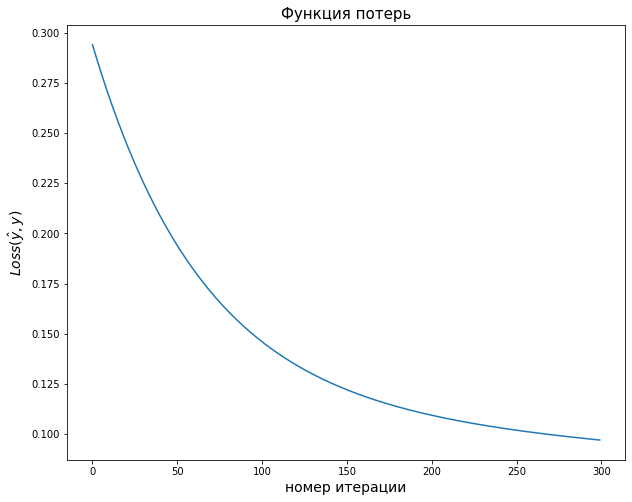

CPU times: user 252 ms, sys: 11.9 ms, total: 264 ms
Wall time: 262 ms


In [ ]:
%%time

neuron_relu = NeuronReLU()
Loss_values = neuron_relu.fit(X, y)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å', fontsize=15)
plt.xlabel('–Ω–æ–º–µ—Ä –∏—Ç–µ—Ä–∞—Ü–∏–∏', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

–í—Å—ë –ø—Ä–æ—Å—Ç–æ -- –µ—Å–ª–∏ –ø—Ä–∏—Å–º–æ—Ç—Ä–µ—Ç—å—Å—è, —Ç–æ –≤–∏–¥–Ω–æ, —á—Ç–æ self.w –∏ self.b –∏–Ω–∏—Ü–∏–ª–∏–∑–∏—Ä—É—é—Ç—Å—è –Ω—É–ª—è–º–∏ –≤ –Ω–∞—á–∞–ª–µ `.fit()`-–º–µ—Ç–æ–¥–∞. –ï—Å–ª–∏ —Ä–∞—Å–ø–∏—Å–∞—Ç—å, –∫–∞–∫ –±—É–¥–µ—Ç –∏–¥—Ç–∏ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ, —Ç–æ –≤–∏–¥–Ω–æ, —á—Ç–æ –∏–∑-–∑–∞ ReLU –≤–µ—Å–∞ –ø—Ä–æ—Å—Ç–æ-–Ω–∞–ø—Ä–æ—Å—Ç–æ –Ω–µ –±—É–¥—É—Ç –æ–±–Ω–æ–≤–ª—è—Ç—å—Å—è, –µ—Å–ª–∏ –Ω–∞—á–∞—Ç—å —Å –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –Ω—É–ª—è–º–∏. 

–≠—Ç–æ -- –æ–¥–Ω–∞ –∏–∑ –ø—Ä–∏—á–∏–Ω, –ø–æ –∫–æ—Ç–æ—Ä–æ–π –≤ –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç—è—Ö –≤–µ—Å–∞ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É—é—Ç —Å–ª—É—á–∞–Ω—ã–º–∏ —á–∏—Å–ª–∞–º–∏ (–æ–±—ã—á–Ω–æ –∏–∑ –æ—Ç—Ä–µ–∑–∫–∞ [0, 1)).

–û–±—É—á–∏—Ç–µ –Ω–µ–π—Ä–æ–Ω, –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–≤ —Å–ª—É—á–∞–π–Ω–æ –≤–µ—Å–∞ (–ø–æ—Å—Ç–∞–≤—å—Ç–µ 10000 –∏—Ç–µ—Ä–∞—Ü–∏–π). 

–ó–∞–∫–æ–º–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—é –Ω—É–ª—è–º–∏ –≤ —Ñ—É–Ω–∫—Ü–∏–∏ `.fit()` –∫–ª–∞—Å—Å–∞ `NeuronReLU` 

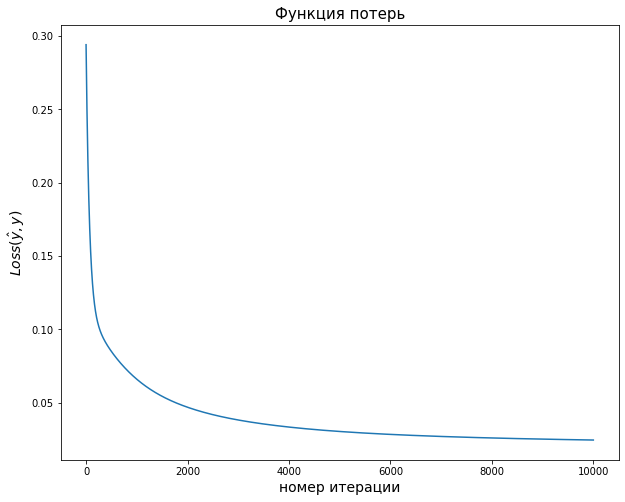

CPU times: user 991 ms, sys: 1.51 ms, total: 992 ms
Wall time: 992 ms


In [ ]:
%%time

neuron_relu = NeuronReLU(w=np.random.rand(X.shape[1], 1), b=np.random.rand(1))
Loss_values = neuron_relu.fit(X, y, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å', fontsize=15)
plt.xlabel('–Ω–æ–º–µ—Ä –∏—Ç–µ—Ä–∞—Ü–∏–∏', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç —ç—Ç–æ—Ç –Ω–µ–π—Ä–æ–Ω:

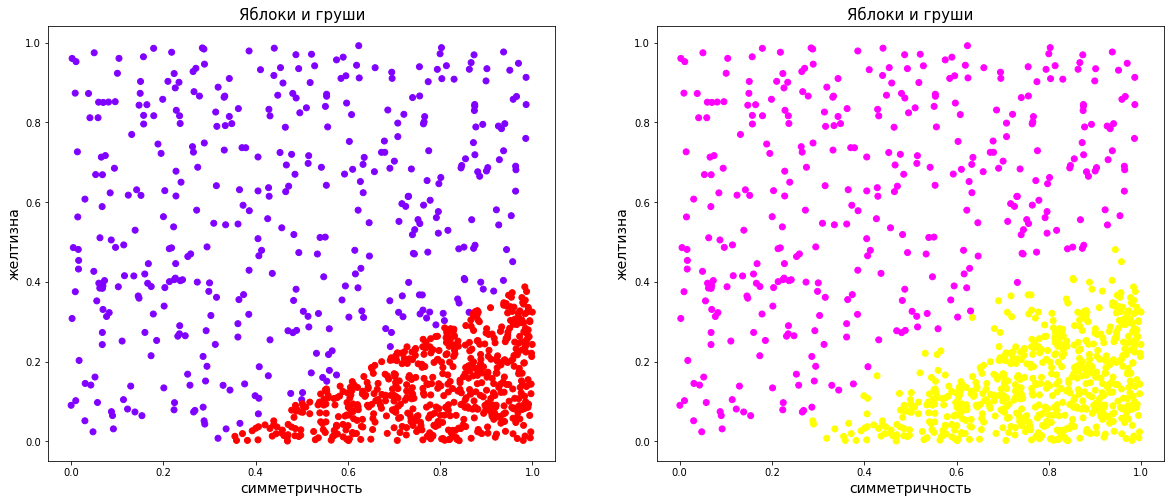

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['target'], cmap='rainbow')
plt.title('–Ø–±–ª–æ–∫–∏ –∏ –≥—Ä—É—à–∏', fontsize=15)
plt.xlabel('—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ—Å—Ç—å', fontsize=14)
plt.ylabel('–∂–µ–ª—Ç–∏–∑–Ω–∞', fontsize=14)

plt.subplot(1, 2, 2)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=neuron_relu.predict(X).ravel(), cmap='spring')
plt.title('–Ø–±–ª–æ–∫–∏ –∏ –≥—Ä—É—à–∏', fontsize=15)
plt.xlabel('—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ—Å—Ç—å', fontsize=14)
plt.ylabel('–∂–µ–ª—Ç–∏–∑–Ω–∞', fontsize=14)
plt.show()

In [ ]:
accuracy_score(neuron_relu.predict(X).ravel(), y)

0.952

–ï—Å—Ç—å –æ–¥–Ω–∞ —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è: –ø–æ—Ä–æ–≥–æ–≤–∞—è —Ñ—É–Ω–∫—Ü–∏—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –∏ —Å–∏–≥–º–æ–∏–¥–∞ (–æ–±—ã—á–Ω–æ –≤—Å—ë –∂–µ —Ç–æ–ª—å–∫–æ —Å–∏–≥–º–æ–∏–¥–∞) —á–∞—â–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –∏–º–µ–Ω–Ω–æ –Ω–∞ **–≤—ã—Ö–æ–¥–Ω–æ–º —Å–ª–æ–µ** –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ –≤ –∑–∞–¥–∞—á–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ -- –∏–º–∏ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ–±—ä–µ–∫—Ç–æ–≤ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—Ç—å –æ–¥–Ω–æ–º—É –∏–∑ –∫–ª–∞—Å—Å–æ–≤, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ –ø—Ä–æ–¥–≤–∏–Ω—É—Ç—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ (ReLU –∏ —Ç–µ, —á—Ç–æ –±—É–¥—É—Ç –¥–∞–ª—å—à–µ) –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –≤–Ω—É—Ç—Ä–∏ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏, —Ç–æ –µ—Å—Ç—å –≤ **—Å–∫—Ä—ã—Ç—ã—Ö —Å–ª–æ—è—Ö**.

–ù—É–∂–Ω–æ –ø–æ–Ω–∏–º–∞—Ç—å, —á—Ç–æ ReLU –Ω–µ –º–æ–∂–µ—Ç –≤–µ—Ä–Ω—É—Ç—å –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ —á–∏—Å–ª–∞.

### –ì–æ–ª–æ—Å

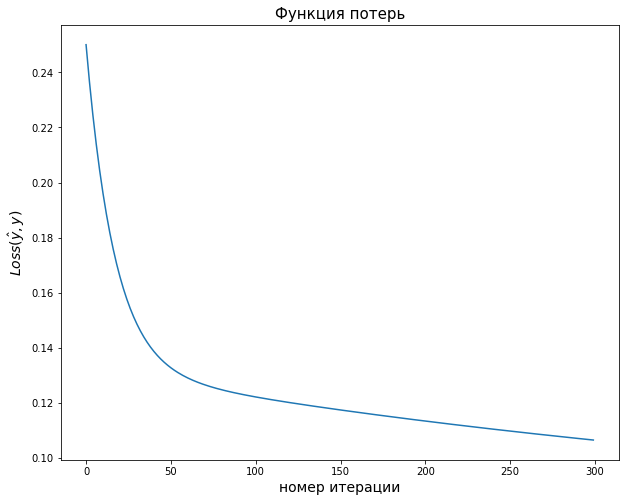

CPU times: user 337 ms, sys: 188 ms, total: 525 ms
Wall time: 333 ms


In [ ]:
%%time

neuron_relu_v = NeuronReLU(w=np.random.rand(X.shape[1], 1), b=np.random.rand(1))
Loss_values = neuron_relu_v.fit(X_v, y_v)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å', fontsize=15)
plt.xlabel('–Ω–æ–º–µ—Ä –∏—Ç–µ—Ä–∞—Ü–∏–∏', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

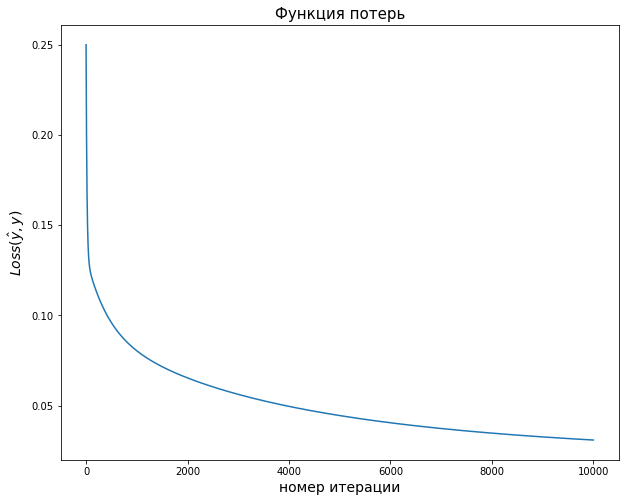

CPU times: user 3.12 s, sys: 2.72 s, total: 5.84 s
Wall time: 3.81 s


In [ ]:
%%time

neuron_relu_v = NeuronReLU(w=np.random.rand(X.shape[1], 1), b=np.random.rand(1))
Loss_values = neuron_relu_v.fit(X_v, y_v, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å', fontsize=15)
plt.xlabel('–Ω–æ–º–µ—Ä –∏—Ç–µ—Ä–∞—Ü–∏–∏', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

In [ ]:
accuracy_score(y_v, neuron_relu_v.predict(X_v)).round(4)

0.9473

**–ü–ª—é—Å—ã ReLU:**

* –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞—è (—Å –¥–æ–æ–ø—Ä–µ–¥–µ–ª–µ
–Ω–∏–µ–º –≤ –Ω—É–ª–µ)
* –Ω–µ—Ç –ø—Ä–æ–±–ª–µ–º—ã –∑–∞—Ç—É—Ö–∞—é—â–∏—Ö –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤, –∫–∞–∫ –≤ —Å–∏–≥–º–æ–∏–¥–µ

**–í–æ–∑–º–æ–∂–Ω—ã–µ –º–∏–Ω—É—Å—ã ReLU:**

* –Ω–µ —Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–∞ –æ–∫–æ–ª–æ 0 (–º–æ–∂–µ—Ç –º–µ—à–∞—Ç—å —Å–∫–æ—Ä–æ—Å—Ç–∏ —Å—Ö–æ–¥–∏–º—Å—Ç–∏)
* –∑–∞–Ω—É–ª—è–µ—Ç –≤—Å–µ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –≤—Ö–æ–¥—ã, —Ç–µ–º —Å–∞–º—ã–º –≤–µ—Å–∞ —É –∑–∞–Ω—É–ª—ë–Ω–Ω—ã—Ö –Ω–µ–π—Ä–æ–Ω–æ–≤ –º–æ–≥—É—Ç —á–∞—Å—Ç–æ *–Ω–µ –æ–±–Ω–æ–≤–ª—è—Ç—å—Å—è*, —ç—Ç—É –ø—Ä–æ–±–ª–µ–º—É –∏–Ω–æ–≥–¥–∞ –Ω–∞–∑—ã–≤–∞—é—Ç *–º—ë—Ä—Ç–≤—ã–µ –Ω–µ–π—Ä–æ–Ω—ã*

–° –ø–æ—Å–ª–µ–¥–Ω–µ–π –ø—Ä–æ–±–ª–µ–º–æ–π –º–æ–∂–Ω–æ –ø–æ–±–æ—Ä–æ—Ç—å—Å—è, –∞ –∏–º–µ–Ω–Ω–æ:

# –ù–µ–π—Ä–æ–Ω —Å LeakyReLU (Leaky Recitified Linear Unit)

LeakyReLU –æ—á–µ–Ω—å —Å–ª–∞–±–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç ReLU, –Ω–æ —á–∞—Å—Ç–æ –ø–æ–º–æ–≥–∞–µ—Ç —Å–µ—Ç–∏ –æ–±—É—á–∞—Ç—å—Å—è –±—ã—Å—Ç—Ä–µ–µ, –ø–æ—Å–∫–æ–ª—å–∫—É –Ω–µ—Ç –ø—Ä–æ–±–ª–µ–º—ã "–º—ë—Ä—Ç–≤—ã—Ö –Ω–µ–π—Ä–æ–Ω–æ–≤":

\begin{equation*}
LeakyReLU(x) =
 \begin{cases}
   \alpha x, &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

–≥–¥–µ $\alpha$ -- –º–∞–ª–µ–Ω—å–∫–æ–µ —á–∏—Å–ª–æ –æ—Ç 0 –¥–æ 1.

–ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è –∑–¥–µ—Å—å –±–µ—Ä—ë—Ç—Å—è —Ç–∞–∫ –∂–µ, –Ω–æ –≤–º–µ—Å—Ç–æ –Ω—É–ª—è –±—É–¥–µ—Ç $\alpha$:

\begin{equation*}
LeakyReLU'(x) = 
 \begin{cases}
   \alpha, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

–ì—Ä–∞—Ñ–∏–∫ —ç—Ç–æ–π —Ñ—É–Ω–∫—Ü–∏–∏:

<img src="https://cdn-images-1.medium.com/max/1600/0*UtLlZJ80TMIM7kXk." width=400 height=300>

–ü–æ–¥—Å—Ç–∞–≤–∏–º LeakyReLu –≤ Loss:

$$
Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (LeakyReLU(w \cdot X_i) - y_i)^2 =
\begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n} 
 \begin{cases}
   (\alpha \cdot w \cdot X_i - y_i)^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}
$$  

–§–æ—Ä–º—É–ª–∞ –¥–ª—è –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≤–µ—Å–æ–≤ –ø—Ä–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–º —Å–ø—É—Å–∫–µ:

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\frac{1}{n}\sum_{i=1}^{n} 
 \begin{cases}
   \alpha X_i^T (w \cdot X_i - y), &{w \cdot X_i \le 0}\\
    X_i^T (w \cdot X_i - y), &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

* –†–µ–∞–ª–∏–∑—É–π—Ç–µ LeakyReLU –∏ –µ—ë –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é:

In [ ]:
def leaky_relu(x, alpha=0.01):
    """LeakyReLU-—Ñ—É–Ω–∫—Ü–∏—è"""
    return np.where(x > 0, x, x * alpha)

In [ ]:
def leaky_relu_derivative(x, alpha=0.01):
    """–ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è LeakyReLU"""
    return np.where(x > 0, 1, alpha)

–¢–µ–ø–µ—Ä—å –Ω—É–∂–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å –Ω–µ–π—Ä–æ–Ω —Å LeakyReLU —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏. –ó–¥–µ—Å—å –≤—Å—ë –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–µ –Ω–∞ –ø–µ—Ä—Ü–µ–ø—Ç—Ä–æ–Ω, –Ω–æ –±—É–¥—É—Ç –ø–æ-–¥—Ä—É–≥–æ–º—É –æ–±–Ω–æ–≤–ª—è—Ç—å—Å—è –≤–µ—Å–∞ –∏ –¥—Ä—É–≥–∞—è —Ñ—É–Ω–∫—Ü–∏—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏:

In [ ]:
class NeuronLeakyReLU:
    def __init__(self, w=None, b=0):
        """
        :param: w -- –≤–µ–∫—Ç–æ—Ä –≤–µ—Å–æ–≤
        :param: b -- —Å–º–µ—â–µ–Ω–∏–µ
        """
        self.w = w
        self.b = b
        
        
    def activate(self, x):
        return leaky_relu(x)
        
        
    def forward_pass(self, X):
        """
        –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç –æ—Ç–≤–µ—Ç –Ω–µ–π—Ä–æ–Ω–∞ –ø—Ä–∏ –ø—Ä–µ–¥—ä—è–≤–ª–µ–Ω–∏–∏ –Ω–∞–±–æ—Ä–∞ –æ–±—ä–µ–∫—Ç–æ–≤
        :param: X -- –º–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–º–µ—Ä–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, m), –∫–∞–∂–¥–∞—è —Å—Ç—Ä–æ–∫–∞ - –æ—Ç–¥–µ–ª—å–Ω—ã–π –æ–±—ä–µ–∫—Ç
        :return: –≤–µ–∫—Ç–æ—Ä —Ä–∞–∑–º–µ—Ä–∞ (n, 1) –∏–∑ –Ω—É–ª–µ–π –∏ –µ–¥–∏–Ω–∏—Ü —Å –æ—Ç–≤–µ—Ç–∞–º–∏ –Ω–µ–π—Ä–æ–Ω–∞ 
        """
        n = X.shape[0]
        y_pred = np.zeros((n, 1))  # y_pred == y_predicted - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã
        y_pred = self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)
        return y_pred.reshape(-1, 1)
        
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        """
        –û–±–Ω–æ–≤–ª—è–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –≤–µ—Å–æ–≤ –Ω–µ–π—Ä–æ–Ω–∞ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å —ç—Ç–∏–º –æ–±—ä–µ–∫—Ç–æ–º
        :param: X -- –º–∞—Ç—Ä–∏—Ü–∞ –≤—Ö–æ–¥–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, m)
                y -- –≤–µ–∫—Ç–æ—Ä –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, 1)
                learning_rate - "—Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è" (—Å–∏–º–≤–æ–ª alpha –≤ —Ñ–æ—Ä–º—É–ª–∞—Ö –≤—ã—à–µ)
        –í —ç—Ç–æ–º –º–µ—Ç–æ–¥–µ –Ω–∏—á–µ–≥–æ –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å –Ω–µ –Ω—É–∂–Ω–æ, —Ç–æ–ª—å–∫–æ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø–æ–º–µ–Ω—è—Ç—å –≤–µ—Å–∞
        —Å –ø–æ–º–æ—â—å—é –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞.
        """
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        sigma = self.activate(X @ self.w + self.b)
        self.w -= learning_rate * (X.T @ (sigma - y)) / n
        self.b -= learning_rate * np.mean(sigma - y)


    def predict(self, X):
        return np.around(self.forward_pass(X))
    
    def fit(self, X, y, num_epochs=300):
        """
        –°–ø—É—Å–∫–∞–µ–º—Å—è –≤ –º–∏–Ω–∏–º—É–º
        :param: X -- –º–∞—Ç—Ä–∏—Ü–∞ –æ–±—ä–µ–∫—Ç–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, m)
                y -- –≤–µ–∫—Ç–æ—Ä –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, 1)
                num_epochs -- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –æ–±—É—á–µ–Ω–∏—è
        :return: losses -- –≤–µ–∫—Ç–æ—Ä –∑–Ω–∞—á–µ–Ω–∏–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å
        """
        self.w = np.zeros((X.shape[1], 1))  # —Å—Ç–æ–ª–±–µ—Ü (m, 1)
        self.b = 0  # —Å–º–µ—â–µ–Ω–∏–µ (—á–∏—Å–ª–æ)
        Loss_values = []  # –∑–Ω–∞—á–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∏—Ç–µ—Ä–∞—Ü–∏—è—Ö –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≤–µ—Å–æ–≤
        
        for i in range(num_epochs):
            y_pred = self.forward_pass(X)
            Loss_values.append(Loss(y_pred, y))
            self.backward_pass(X, y, y_pred)
        
        return Loss_values

**–ü–ª—é—Å—ã LeakyReLU:**

* –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞—è (—Å –¥–æ–æ–ø—Ä–µ–¥–µ–ª–Ω–∏–µ–º –≤ –Ω—É–ª–µ)
* –Ω–µ—Ç –ø—Ä–æ–±–ª–µ–º—ã –∑–∞—Ç—É—Ö–∞—é—â–∏—Ö –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤, –∫–∞–∫ –≤ —Å–∏–≥–º–æ–∏–¥–µ
* –Ω–µ—Ç –ø—Ä–æ–±–ª–µ–º—ã "–º—ë—Ä—Ç–≤—ã—Ö –Ω–µ–π—Ä–æ–Ω–æ–≤", –∫–∞–∫ –≤ ReLU

**–í–æ–∑–º–æ–∂–Ω—ã–µ –º–∏–Ω—É—Å—ã LeakyReLU:**

* –Ω–µ —Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–∞ –æ–∫–æ–ª–æ 0 (–º–æ–∂–µ—Ç –º–µ—à–∞—Ç—å —Å–∫–æ—Ä–æ—Å—Ç–∏ —Å—Ö–æ–¥–∏–º—Å—Ç–∏)
* –Ω–µ–º–Ω–æ–≥–æ –Ω–µ —É—Å—Ç–æ–π—á–∏–≤–∞ –∫ "—à—É–º—É" (—Å–º. –ª–µ–∫—Ü–∏–∏ –°—Ç—ç–Ω—Ñ–æ—Ä–¥–∞)

# –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ–π—Ä–æ–Ω–∞ —Å LeakyReLu

## –Ø–±–ª–æ–∫–∏ –∏ –≥—Ä—É—à–∏

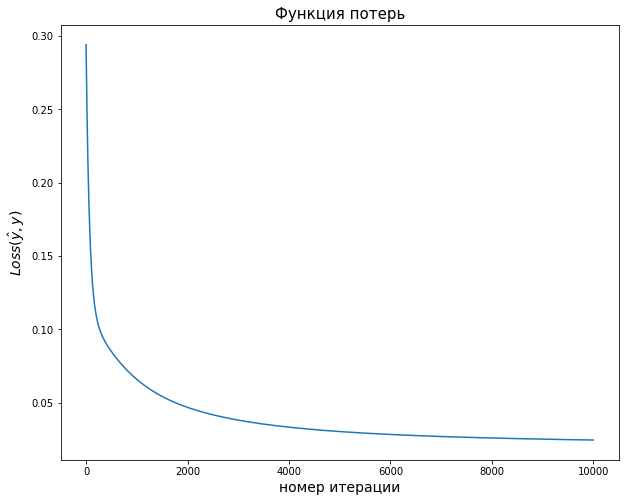

CPU times: user 1.05 s, sys: 13.2 ms, total: 1.06 s
Wall time: 1.07 s


In [ ]:
%%time

neuron_l = NeuronLeakyReLU(w=np.random.rand(X.shape[1], 1), b=np.random.rand(1))
Loss_values_l = neuron_l.fit(X, y, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values_l)
plt.title('–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å', fontsize=15)
plt.xlabel('–Ω–æ–º–µ—Ä –∏—Ç–µ—Ä–∞—Ü–∏–∏', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

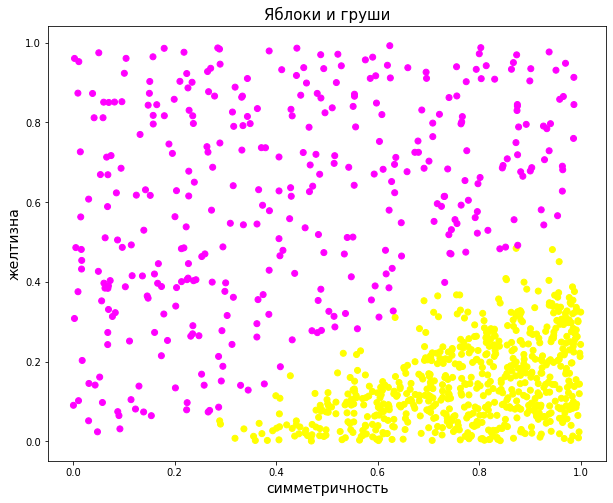

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=neuron_l.predict(X).ravel(), cmap='spring')
plt.title('–Ø–±–ª–æ–∫–∏ –∏ –≥—Ä—É—à–∏', fontsize=15)
plt.xlabel('—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ—Å—Ç—å', fontsize=14)
plt.ylabel('–∂–µ–ª—Ç–∏–∑–Ω–∞', fontsize=14)
plt.show()

In [ ]:
accuracy_score(y, neuron_l.predict(X))

0.951

## –ì–æ–ª–æ—Å

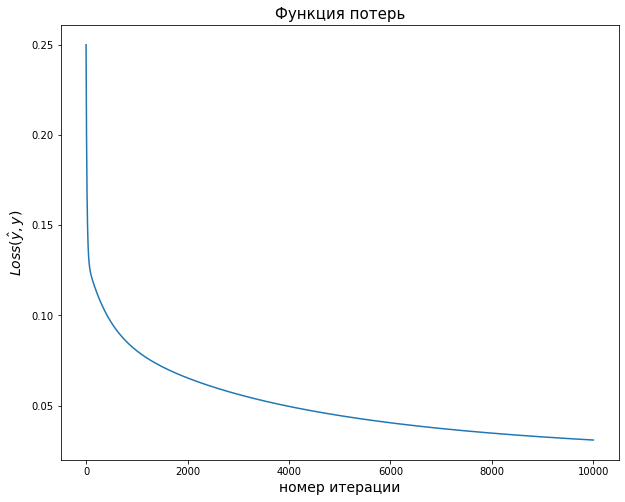

CPU times: user 3.19 s, sys: 2.24 s, total: 5.43 s
Wall time: 2.91 s


In [ ]:
%%time

neuron_l = NeuronLeakyReLU()
Loss_values_l = neuron_l.fit(X_v, y_v, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values_l)
plt.title('–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å', fontsize=15)
plt.xlabel('–Ω–æ–º–µ—Ä –∏—Ç–µ—Ä–∞—Ü–∏–∏', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

In [ ]:
accuracy_score(y_v, neuron_l.predict(X_v)).round(4)

0.95

# –ù–µ–π—Ä–æ–Ω —Å ELU (Exponential Linear Unit)

ELU -- –Ω–µ —Ç–∞–∫ –¥–∞–≤–Ω–æ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω–∞—è (–≤ 2015 –≥–æ–¥—É) —Ñ—É–Ω–∫—Ü–∏—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è, –∫–∞–∫ –≥–æ–≤–æ—Ä—è—Ç –∞–≤—Ç–æ—Ä—ã —Å—Ç–∞—Ç—å–∏, –ª—É—á—à–µ LeakyReLU. –í–æ—Ç —Ñ–æ—Ä–º—É–ª–∞ ELU:

\begin{equation*}
ELU(\alpha, x) =
 \begin{cases}
   \alpha (e^x - 1), &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

–≥–¥–µ $\alpha$ -- –º–∞–ª–µ–Ω—å–∫–æ–µ —á–∏—Å–ª–æ –æ—Ç 0 –¥–æ 1.

–ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è –∑–¥–µ—Å—å –±–µ—Ä—ë—Ç—Å—è —Ç–∞–∫ –∂–µ, –Ω–æ –≤–º–µ—Å—Ç–æ –Ω—É–ª—è –±—É–¥–µ—Ç $\alpha$:

\begin{equation*}
ELU'(x) = 
 \begin{cases}
   ELU(\alpha, x) + \alpha, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

–ó–¥–µ—Å—å –≤ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω –ø–æ—Å—Ç–æ–π —Ç—Ä—é–∫ -- —Å–¥–µ–ª–∞–Ω–æ $- \alpha + \alpha$, —á—Ç–æ–±—ã –≤—ã—á–∏—Å–ª—è—Ç—å –±—ã–ª–æ –ø—Ä–æ—â–µ.

–ì—Ä–∞—Ñ–∏–∫ —ç—Ç–æ–π —Ñ—É–Ω–∫—Ü–∏–∏:

<img src="http://p0.ifengimg.com/pmop/2017/0907/A004001DD141881BFD8AD62E5D31028C3BE3FAD1_size14_w446_h354.png" width=500 height=400>

–ü–æ–¥—Å—Ç–∞–≤–∏–º LeakyReLu –≤ Loss:

$$Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (ELU(\alpha, w \cdot X_i) - y_i)^2 = \begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n} 
 \begin{cases}
   (\alpha (e^{w \cdot X_i} - 1) - y_i)^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$  

–ó–¥–µ—Å—å –≤–∞–º –Ω—É–∂–Ω–æ –≤—ã–ø–∏—Å–∞—Ç—å —Å–∞–º–∏–º –≥—Ä–∞–¥ —Å–ø—É—Å–∫ –¥–ª—è –≤–µ—Å–æ–≤. –ë—Ä–∞—Ç—å –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é "–≤ –ª–æ–±" –Ω–µ–∫—Ä–∞—Å–∏–≤–æ –∏ –Ω–µ—É–¥–æ–±–Ω–æ. –ù—É–∂–Ω–æ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è **–ø—Ä–∞–≤–∏–ª–æ–º —Ü–µ–ø–æ—á–∫–∏**, –æ–Ω–æ –∂–µ **–ø—Ä–∞–≤–∏–ª–æ –≤–∑—è—Ç–∏—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π —Å–ª–æ–∂–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏**:

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\frac{1}{n}\sum_{i=1}^{n} 
 \begin{cases}
   , &{w \cdot X_i \le 0}\\
   , &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

* –†–µ–∞–ª–∏–∑—É–π—Ç–µ ELU –∏ –µ—ë –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é:

In [ ]:
from math import e

In [ ]:
def eelu(x, alpha=0.01):
    """LeakyReLU-—Ñ—É–Ω–∫—Ü–∏—è"""
    return x if x >= 0 else alpha*(e**x -1)

In [ ]:
def elu_derivative(x, alpha=0.01):
    """–ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è LeakyReLU"""
    return 1 if x > 0 else (eelu(x,alpha) + alpha)

–¢–µ–ø–µ—Ä—å –Ω—É–∂–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å –Ω–µ–π—Ä–æ–Ω —Å LeakyReLU —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏. –ó–¥–µ—Å—å –≤—Å—ë –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–µ –Ω–∞ –ø–µ—Ä—Ü–µ–ø—Ç—Ä–æ–Ω, –Ω–æ –±—É–¥—É—Ç –ø–æ-–¥—Ä—É–≥–æ–º—É –æ–±–Ω–æ–≤–ª—è—Ç—å—Å—è –≤–µ—Å–∞ –∏ –¥—Ä—É–≥–∞—è —Ñ—É–Ω–∫—Ü–∏—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏:

In [ ]:
class NeuronELU:
    def __init__(self, w=None, b=0):
        """
        :param: w -- –≤–µ–∫—Ç–æ—Ä –≤–µ—Å–æ–≤
        :param: b -- —Å–º–µ—â–µ–Ω–∏–µ
        """
        self.w = w
        self.b = b
        
        
    def activate(self, x):
        func = np.vectorize(eelu)
        return func(x)
        
        
    def forward_pass(self, X):
        """
        –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç –æ—Ç–≤–µ—Ç –Ω–µ–π—Ä–æ–Ω–∞ –ø—Ä–∏ –ø—Ä–µ–¥—ä—è–≤–ª–µ–Ω–∏–∏ –Ω–∞–±–æ—Ä–∞ –æ–±—ä–µ–∫—Ç–æ–≤
        :param: X -- –º–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–º–µ—Ä–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, m), –∫–∞–∂–¥–∞—è —Å—Ç—Ä–æ–∫–∞ - –æ—Ç–¥–µ–ª—å–Ω—ã–π –æ–±—ä–µ–∫—Ç
        :return: –≤–µ–∫—Ç–æ—Ä —Ä–∞–∑–º–µ—Ä–∞ (n, 1) –∏–∑ –Ω—É–ª–µ–π –∏ –µ–¥–∏–Ω–∏—Ü —Å –æ—Ç–≤–µ—Ç–∞–º–∏ –Ω–µ–π—Ä–æ–Ω–∞ 
        """
        n = X.shape[0]
        y_pred = np.zeros((n, 1))  # y_pred == y_predicted - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã
        y_pred = self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)
        return y_pred.reshape(-1, 1)
        
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        """
        –û–±–Ω–æ–≤–ª—è–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –≤–µ—Å–æ–≤ –Ω–µ–π—Ä–æ–Ω–∞ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å —ç—Ç–∏–º –æ–±—ä–µ–∫—Ç–æ–º
        :param: X -- –º–∞—Ç—Ä–∏—Ü–∞ –≤—Ö–æ–¥–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, m)
                y -- –≤–µ–∫—Ç–æ—Ä –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, 1)
                learning_rate - "—Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è" (—Å–∏–º–≤–æ–ª alpha –≤ —Ñ–æ—Ä–º—É–ª–∞—Ö –≤—ã—à–µ)
        –í —ç—Ç–æ–º –º–µ—Ç–æ–¥–µ –Ω–∏—á–µ–≥–æ –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å –Ω–µ –Ω—É–∂–Ω–æ, —Ç–æ–ª—å–∫–æ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø–æ–º–µ–Ω—è—Ç—å –≤–µ—Å–∞
        —Å –ø–æ–º–æ—â—å—é –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞.
        """
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        sigma = self.activate(X @ self.w + self.b)
        func = np.vectorize(elu_derivative)
        der = func(X)
        self.w -= learning_rate * (X.T @ (sigma - y) * der) / n
        self.b -= learning_rate * np.mean(sigma - y)
    
    def predict(self, X):
        return np.around(self.forward_pass(X))


    def fit(self, X, y, num_epochs=300):
        """
        –°–ø—É—Å–∫–∞–µ–º—Å—è –≤ –º–∏–Ω–∏–º—É–º
        :param: X -- –º–∞—Ç—Ä–∏—Ü–∞ –æ–±—ä–µ–∫—Ç–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, m)
                y -- –≤–µ–∫—Ç–æ—Ä –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ (n, 1)
                num_epochs -- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –æ–±—É—á–µ–Ω–∏—è
        :return: losses -- –≤–µ–∫—Ç–æ—Ä –∑–Ω–∞—á–µ–Ω–∏–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å
        """
        self.w = np.zeros((X.shape[1], 1))  # —Å—Ç–æ–ª–±–µ—Ü (m, 1)
        self.b = 0  # —Å–º–µ—â–µ–Ω–∏–µ (—á–∏—Å–ª–æ)
        Loss_values = []  # –∑–Ω–∞—á–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∏—Ç–µ—Ä–∞—Ü–∏—è—Ö –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≤–µ—Å–æ–≤
        
        for i in range(num_epochs):
            y_pred = self.forward_pass(X)
            Loss_values.append(Loss(y_pred, y))
            self.backward_pass(X, y, y_pred)
        
        return Loss_values

In [ ]:
w = np.array([1., 2.]).reshape(2, 1)
b = 2.
X_t = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])

neuron = NeuronELU(w, b)
y_pred = neuron.forward_pass(X_t)
print ("y_pred = " + str(y_pred))

y_pred = [[ 9.00000000e+00]
 [ 1.20000000e+01]
 [-9.95483419e-03]]


In [ ]:
y_t = np.array([1, 0, 1]).reshape(3, 1)

In [ ]:
fun = np.vectorize(elu_derivative)
der = fun(X_t)
print(der)

[[1 1]
 [1 1]
 [0 0]]


**–ü–ª—é—Å—ã ELU:**

* –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞—è (—Å –¥–æ–æ–ø—Ä–µ–¥–µ–ª–Ω–∏–µ–º –≤ –Ω—É–ª–µ)
* –Ω–µ—Ç –ø—Ä–æ–±–ª–µ–º—ã –∑–∞—Ç—É—Ö–∞—é—â–∏—Ö –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤, –∫–∞–∫ –≤ —Å–∏–≥–º–æ–∏–¥–µ
* –Ω–µ—Ç –ø—Ä–æ–±–ª–µ–º—ã "–º—ë—Ä—Ç–≤—ã—Ö –Ω–µ–π—Ä–æ–Ω–æ–≤", –∫–∞–∫ –≤ ReLU
* –±–æ–ª–µ–µ —É—Å—Ç–æ–π—á–∏–≤–∞ –∫ "—à—É–º—É" (—Å–º. –ª–µ–∫—Ü–∏–∏ –°—Ç—ç–Ω—Ñ–æ—Ä–¥–∞)

**–í–æ–∑–º–æ–∂–Ω—ã–µ –º–∏–Ω—É—Å—ã ELU:**

* –Ω–µ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–æ —Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–∞ –æ–∫–æ–ª–æ 0 (–º–æ–∂–µ—Ç –º–µ—à–∞—Ç—å —Å–∫–æ—Ä–æ—Å—Ç–∏ —Å—Ö–æ–¥–∏–º—Å—Ç–∏)
* –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–æ –¥–æ–ª—å—à–µ, —á–µ–º ReLU –∏ LeakyReLU

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –º–æ–¥–µ–ª—è–º–∏ –∏–∑ –∫–æ—Ä–æ–±–∫–∏

In [ ]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model_relu = keras.Sequential([
    layers.Dense(units=1, input_shape=(2,), activation='relu')
])
model_relu.compile(loss=keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [ ]:
model_relu.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_relu.fit(X, y, epochs = 1000)

Epoch 1/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.5730
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.5600
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.5370
Epoch 4/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5441 - accuracy: 0.5010
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.4810
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.4550
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.4520
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.4520
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.4440
Epoch 10/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.4480

`Accuracy` –º–æ–¥–µ–ª–∏ –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ "–Ø–±–ª–æ–∫–∏ –∏ –≥—Ä—É—à–∏" –∫–æ–ª–µ–±–ª–µ—Ç—Å—è –≤ —Ä–∞–π–æ–Ω–µ 0.9660-0.9680, —á—Ç–æ –Ω–µ–º–Ω–æ–≥–æ –ª—É—á—à–µ –Ω–∞—à–µ–≥–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –≤ 0.952.

In [ ]:
model_relu_v = keras.Sequential([
    layers.Dense(units=1, input_shape=(20,), activation='relu')
])
model_relu_v.compile(loss=keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [ ]:
model_relu_v.fit(X_v, y_v, epochs = 1000)

Epoch 1/1000
99/99 [==============================] - 0s 4ms/step - loss: 0.1895 - accuracy: 0.7459
Epoch 2/1000
99/99 [==============================] - 0s 3ms/step - loss: 0.1718 - accuracy: 0.7854
Epoch 3/1000
99/99 [==============================] - 0s 3ms/step - loss: 0.1564 - accuracy: 0.8153
Epoch 4/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.8438
Epoch 5/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.8564
Epoch 6/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.8722
Epoch 7/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.8829
Epoch 8/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.1089 - accuracy: 0.8898
Epoch 9/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.8952
Epoch 10/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 0.9015

–ù–∞ –∫–æ—Ä–æ–±–æ—á–Ω–æ–º –Ω–µ–π—Ä–æ–Ω–µ –≤ —Å–ª—É—á–∞–µ —Å –¥–∞–Ω–Ω—ã–º–∏ "–ì–æ–ª–æ—Å" –ø–æ–ª—É—á–∏–ª–∏ `accuracy` 0.9738 –Ω–∞ 1000 —ç–ø–æ—Ö–µ. –Ø –Ω–µ –±—Ä–∞–ª–∞ —Ç–∞–∫ –º–Ω–æ–≥–æ —ç–ø–æ—Ö, –∫–∞–∫ –¥–ª—è –Ω–∞–ø–∏—Å–∞–Ω–Ω–æ–≥–æ –≤—Ä—É—á–Ω—É—é –Ω–µ–π—Ä–æ–Ω–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ —Ç—É—Ç `accuracy` –Ω–∞–º–Ω–æ–≥–æ –±—ã—Å—Ç—Ä–µ–µ –≤—Å—Ç–∞–µ—Ç –Ω–∞ –ø–ª–∞—Ç–æ. –¢—É—Ç —Ä–∞–∑–ª–∏—á–∏—è —Å —Ä—É–∫–æ–ø–∏—Å–Ω—ã–º –Ω–µ–π—Ä–æ–Ω–æ–º –ø–æ–±–æ–ª—å—à–µ, —É –Ω–µ–≥–æ `accuracy` –Ω–∞ —Ç–µ—Ö –∂–µ X_v –∏ y_v —Ä–∞–≤–Ω–∞ 0.9473

In [ ]:
model_l = keras.Sequential([                                 
          keras.layers.Dense(units=1, input_shape = (2,),
              activation=keras.layers.LeakyReLU())                         
])

In [ ]:
model_l.compile(loss=keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [ ]:
model_l.fit(X, y, epochs = 1000)

Epoch 1/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.0082 - accuracy: 0.4120
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.9743 - accuracy: 0.4120
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.9431 - accuracy: 0.4120
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.9128 - accuracy: 0.4120
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8832 - accuracy: 0.4120
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8540 - accuracy: 0.4120
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8257 - accuracy: 0.4120
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7986 - accuracy: 0.4120
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7722 - accuracy: 0.4120
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7462 - accuracy: 0.4120

–ù–∞ "–ì—Ä—É—à–∞—Ö" `LeakyReLU` –ø–æ–∫–∞–∑–∞–ª–∞ 0.956 –ø—Ä–æ—Ç–∏–≤ –º–æ–∏—Ö 0.951.

In [ ]:
model_l_v = keras.Sequential([                                 
          keras.layers.Dense(units=1, input_shape = (20,),
              activation=keras.layers.LeakyReLU())                         
])
model_l_v.compile(loss=keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [ ]:
model_l_v.fit(X_v, y_v, epochs = 1000)

Epoch 1/1000
99/99 [==============================] - 1s 2ms/step - loss: 0.4599 - accuracy: 0.5073
Epoch 2/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.5694
Epoch 3/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.6253
Epoch 4/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.6531
Epoch 5/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.6834
Epoch 6/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.7159
Epoch 7/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.7459
Epoch 8/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.7721
Epoch 9/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.8011
Epoch 10/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.8283

–ò –Ω–∞ "–ì–æ–ª–æ—Å–µ" ~0.97 –ø—Ä–æ—Ç–∏–≤ 0.95 –Ω–∞ –º–æ–µ–π —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏.

–ü–æ–ª—É—á–∞–µ—Ç—Å—è, –º–∞—à–∏–Ω—ã –º–µ–Ω—è –ø–æ–±–µ–¥–∏–ª–∏... (–Ω–µ–º–Ω–æ–∂–∫–æ) üòø